## From Sampling Distribution to Confidence Interval

Confidence interval tells us about aggregate values in our population. It doesnt tell us about individuals in the population. More advanced technique like Machine learning will.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv') #assume this to be the population
coffee_sample = coffee_full.sample(200) #this is the only data you might actually get in the real world.

coffee_sample.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [3]:
coffee_sample.isnull().sum()

user_id          0
age              0
drinks_coffee    0
height           0
dtype: int64

### Descriptive Statistics

`1.` What is the proportion of coffee drinkers in the sample? What is the proportion of individuals that don't drink coffee?

In [2]:
print("Proportion of coffee drinkers in the sample is {}".format(coffee_sample['drinks_coffee'].mean()))
print("Proportion of non coffee drinkers in the sample is {}".format(1 - coffee_sample['drinks_coffee'].mean()))

Proportion of coffee drinkers in the sample is 0.595
Proportion of non coffee drinkers in the sample is 0.405


`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [5]:
ave_height_cd = coffee_sample.query('drinks_coffee == True')['height'].mean()
ave_height_ncd = coffee_sample.query('drinks_coffee == False')['height'].mean()

print("Average height of coffee drinkers in the sample is {}".format(ave_height_cd))
print("Average height of non coffee drinkers in the sample is {}".format(ave_height_ncd))

Average height of coffee drinkers in the sample is 68.11962990858618
Average height of non coffee drinkers in the sample is 66.78492279927877


### Bootstrap sampling

Simulate 200 "new" individuals from your original sample of 200. 

`3.` What are the proportion of coffee drinkers in your bootstrap sample? How about individuals that don't drink coffee?

In [6]:
boot_samp = coffee_sample.sample(200,replace=True)
boot_samp['drinks_coffee'].mean()

0.605

In [7]:
1 - boot_samp['drinks_coffee'].mean()

0.395

From the very first sample of 200 data points, simulate a bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. 

In [8]:
boot_means = []
for _ in range(10000):
    bootsamp = coffee_sample.sample(200, replace = True)
    boot_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    boot_means.append(boot_mean)
    

#### Plot the distribution

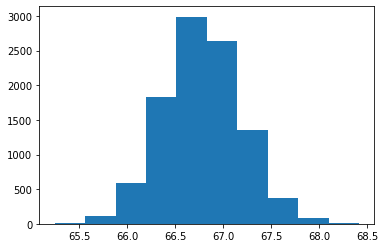

In [9]:
plt.hist(boot_means); # Looks pretty normal

In [10]:
#pull the values necessary for a 95% confidence interval. 
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(65.9929132815752, 67.58402738281573)

In [11]:
#Did our interval capture the actual average height of non-coffee drinkers in the population? 
#Look at the average in the population and the two bounds provided by your 95% confidence interval

ave_height = coffee_full[coffee_full['drinks_coffee'] == False]['height'].mean() 
print("Average height of non coffee drinkers in the population data is {}".format(ave_height))

Average height of non coffee drinkers in the population data is 66.44340776214705


#### Comments: What do you notice about the sampling distribution of the mean in this example?

- The sample mean height for non-coffee drinkers is not same as the population mean height for non-coffee drinkers
- Our confidence interval captures the true mean height for the non-coffee drinkers
- The sampling distribution for non-coffee drinkers is normally distributed

### Confidence interval for difference in means

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers. Build a 99% confidence interval using your sampling distribution. 

In [12]:
diff=[]
for _ in range(10000):
    sample = coffee_sample.sample(200,replace=True)
    drink_cof = sample[sample['drinks_coffee']==True]['height'].mean()
    not_drink_cof = sample[sample['drinks_coffee'] == False]['height'].mean()
    diff.append(drink_cof - not_drink_cof)

#build a 99% interval
np.percentile(diff, 0.5), np.percentile(diff, 99.5) 

(0.09027712929640067, 2.516490937129601)

Confidence interval doesnt contain zero, thus there is a difference in means. On average, coffee drinkers are taller than non coffee drinkers.



In [16]:
drink_cof = coffee_full[coffee_full['drinks_coffee']==True]['height'].mean()
not_drink_cof = coffee_full[coffee_full['drinks_coffee'] == False]['height'].mean()
drink_cof - not_drink_cof


1.9568024933369657

Based on the confidence interval, we have evidence that coffee drinkers are on average taller than non-coffee drinkers.

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution. 

In [14]:
diff_old=[]
for _ in range(10000):
    sample1 = coffee_sample.sample(200,replace=True)
    younger = sample1[sample1['age'] == '<21']['height'].mean()
    older = sample1[sample1['age'] != '>21']['height'].mean()
    diff_old.append(older - younger)
    
np.percentile(diff_old, 0.5), np.percentile(diff_old, 99.5) 

(1.6870112109030933, 2.908662643495249)

Based on the confidence interval, we have evidence that those older than 21 are on average taller than those younger than 21.

`3.` For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals under 21 years old. Using your sampling distribution, build a 95% confidence interval.

In [15]:
diff_age =[]
for _ in range(10000):
    bootsample = coffee_sample.sample(200,replace=True)
    height_drink_coffee = bootsample.query('drinks_coffee == True and age == "<21"')['height'].mean()
    height_not_drink_coffee = bootsample.query('drinks_coffee == False and age == "<21"')['height'].mean()
    diff_age.append(height_drink_coffee  - height_not_drink_coffee)

np.percentile(diff_age,2.5),np.percentile(diff_age,97.5)

(-2.6258697660461863, -1.0809572510874996)